<a href="https://colab.research.google.com/github/chadeowen/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/module4-Model%20Diagnostics/Model_Diagnostics_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Diagnostics

The purpose of this assigment is introduce you to a new library for linear regression called statmodels which is much better suited for inferential modeling than sklearn. This assignment is also to familiarize yourself with some of most important procedures for improving the interpretability of regression coefficients. You will also perform important statistical tests that will help establish that whether or not important assumptions that safeguard the interpretability of OLS coefficients have been met. 

We will continue to use the Ames Housing Dataset so that you can focus on the techniques and not on cleaning/getting associated with a brand new dataset.

## 1.1 Choose an X and Y variable from your dataset and use them to create a Seaborn Regplot

time to clean....

In [0]:
!pip install seaborn==0.9.0

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [0]:
# widen to see all columns
pd.set_option('display.max_columns', 100)

In [4]:
# import data
# use ID as index column

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv', index_col=0)
print(df.shape)
df.head(10)

(1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [5]:
df.isna().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [6]:
# remove columns big NaNs
df = df.drop(axis=1,columns=['PoolQC','Fence','MiscFeature','Alley'])
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [0]:
# interaction engineering and column renaming

df.rename(index=str, columns={"YearRemodAdd": "Age", "TotRmsAbvGrd": "Rooms"})
df['BsmtBath'] = df['BsmtFullBath'] + df['BsmtHalfBath']
df['Baths'] = df['FullBath'] + df['HalfBath']             

In [0]:
# remove extraneous columns

df = df.drop(axis=1,columns=['HalfBath','BsmtFullBath','BsmtHalfBath',
                             'BsmtUnfSF','BsmtFinSF1'])

In [0]:
# numerical NaN fills with Mean
df['LotFrontage'].fillna((df['LotFrontage'].mean()), inplace=True)

# categorical NaN fills with 0
df['BsmtQual'].replace(np.nan, 'TA', regex=True, inplace=True)
df['BsmtExposure'].replace(np.nan, 'AV', regex=True, inplace=True)
df['BsmtFinType1'].replace(np.nan, 'ALQ', regex=True, inplace=True)
df['Electrical'].replace(np.nan, 'Mix', regex=True, inplace=True)
df['GarageCond'].replace(np.nan, 'TA', regex=True, inplace=True)
df['MasVnrType'].replace(np.nan, 'None', regex=True, inplace=True)

In [10]:
# remove other Independent variables
# assuming condition and quality are collinear
df = df.drop(axis=1,columns=['FireplaceQu','GarageQual','GarageYrBlt',
                             'GarageFinish','3SsnPorch','BsmtCond','ExterCond',
                             'MasVnrArea','GarageType','GarageArea','LotShape',
                             'OverallCond','Condition2','BsmtFinType2',
                             'BsmtFinSF2','YearBuilt','Exterior2nd'])

df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'MasVnrType', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageCars', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice',
       'BsmtBath', 'Baths'],
      dtype='object')

In [11]:
df.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
OverallQual      0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
MasVnrType       0
ExterQual        0
Foundation       0
BsmtQual         0
BsmtExposure     0
BsmtFinType1     0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
FullBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageCars       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleConditio

regplot time... lets try square footage

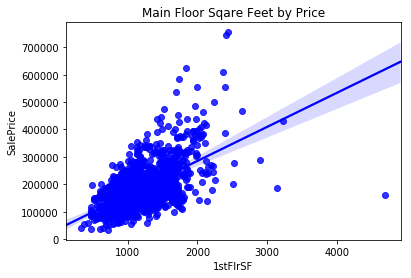

In [12]:
target = df['SalePrice']
regplot_x = df['1stFlrSF']

fig = sns.regplot(regplot_x, target, color='blue').set_title(
    'Main Floor Sqare Feet by Price');

## 1.2 Now using the X variables that you feel like will be the best predictors of y use statsmodel to run the multiple regression between these variables and Y. You don't need to use every X variable in your dataset, in fact it's probably better if you don't. Just pick ones that you have already cleaned that seem the most relevant to house prices.

continue cleaning a little

In [13]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,BsmtBath,Baths
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,2003,Gable,CompShg,VinylSd,BrkFace,Gd,PConc,Gd,No,GLQ,856,GasA,Ex,Y,SBrkr,856,854,0,1710,2,3,1,Gd,8,Typ,0,2,TA,Y,0,61,0,0,0,0,2,2008,WD,Normal,208500,1,3
2,20,RL,80.0,9600,Pave,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,1976,Gable,CompShg,MetalSd,None,TA,CBlock,Gd,Gd,ALQ,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,2,3,1,TA,6,Typ,1,2,TA,Y,298,0,0,0,0,0,5,2007,WD,Normal,181500,1,2
3,60,RL,68.0,11250,Pave,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,2002,Gable,CompShg,VinylSd,BrkFace,Gd,PConc,Gd,Mn,GLQ,920,GasA,Ex,Y,SBrkr,920,866,0,1786,2,3,1,Gd,6,Typ,1,2,TA,Y,0,42,0,0,0,0,9,2008,WD,Normal,223500,1,3
4,70,RL,60.0,9550,Pave,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,1970,Gable,CompShg,Wd Sdng,None,TA,BrkTil,TA,No,ALQ,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,3,1,Gd,7,Typ,1,3,TA,Y,0,35,272,0,0,0,2,2006,WD,Abnorml,140000,1,1
5,60,RL,84.0,14260,Pave,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,2000,Gable,CompShg,VinylSd,BrkFace,Gd,PConc,Gd,Av,GLQ,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,2,4,1,Gd,9,Typ,1,3,TA,Y,192,84,0,0,0,0,12,2008,WD,Normal,250000,1,3


In [0]:
# add age and remove year remodeled

df['Age'] = 2019 - df['YearRemodAdd']
df = df.drop(axis=1, columns=['YearRemodAdd'])

In [0]:
# replace categorical values with numbers

df['MSZoning'] = df['MSZoning'].replace({'A':0, 'C':1, 'FV':2, 'I':3, 'RH':4, 
                        'RL':5, 'RP':6, 'RM':7, 'C (all)':1})

df['Street'] = df['Street'].replace({'Grvl':0, 'Pave':1})

df['LandContour'] = df['LandContour'].replace({'Lvl':0, 'Bnk':1, 'HLS':2, 'Low':3})

df['Utilities'] = df['Utilities'].replace({'AllPub': 0, 'NoSewr': 1, 'NoSeWa':2, 'ELO':3})

df['LotConfig'] = df['LotConfig'].replace({'Inside': 0, 'Corner': 1, 'CulDSac':2,
                         'FR2':3, 'FR3':4})

df['LandSlope'] = df['LandSlope'].replace({'Gtl': 0, 'Mod': 1, 'Sev':2})

df['Neighborhood'] = df['Neighborhood'].replace({'Blmngtn': 0, 'Blueste': 1, 'BrDale':2, 'BrkSide':3,
                            'ClearCr':4, 'CollgCr':5, 
                            'Crawfor':6, 'Edwards':7, 'Gilbert':8, 'IDOTRR':9,
                            'MeadowV':10, 'Mitchel':11, 'Names':12, 
                            'NoRidge':13, 'NPkVill':14, 'NridgHt':15, 
                            'NWAmes':16, 'OldTown':17, 'SWISU':18, 'Sawyer':19,
                            'SawyerW':20,'Somerst':21, 'StoneBr':22,
                            'Timber':23, 'Veenker':24, 'NAmes':12})

df['Condition1'] = df['Condition1'].replace({'Artery': 0, 'Feedr': 1, 'Norm':2, 'RRNn':3, 'RRAn':4,
                          'PosN':5, 'PosA':6, 'RRNe':7, 'RRAe':8})

df['BldgType'] = df['BldgType'].replace({'1Fam': 0, '2FmCon': 1, 'Duplx':2, 'TwnhsE':3,
                        'TwnhsI':4, 'Duplex':2, '2fmCon':1, 'Twnhs':4})

df['HouseStyle'] = df['HouseStyle'].replace({'1Story': 0, '1.5Fin': 2, '1.5Unf':1, '2Story':3,
                          '2.5Fin':5, '2.5Unf':4, 'SFoyer':2.5, 'SLvl':3.5})

df['RoofStyle'] = df['RoofStyle'].replace({'Flat': 0, 'Gable': 1, 'Gambrel':2, 'Hip':3, 
                         'Mansard':4, 'Shed':5})

df['RoofMatl'] = df['RoofMatl'].replace({'ClyTile': 5, 'CompShg': 4, 'Membran':3, 'Metal':2, 
                        'Roll':1, 'Tar&Grv':0, 'WdShake':6, 'WdShng1':7, 'WdShngl':7})

df['Exterior1st'] = df['Exterior1st'].replace({'AsbShng': 0, 'AsphShn': 1, 'BrkComm':2, 'BrkFace':3,
                            'CBlock':4, 'CemntBd':5, 
                            'HdBoard':6, 'ImStucc':7,
                            'MetalSd':8, 'Stucco':9, 
                            'Other':10, 'VinylSd':11, 
                            'Plywood':12, 'Wd Sdng':13,
                            'PreCast':14,'WdShing':15,
                            'Stone':16})

df['MasVnrType'] = df['MasVnrType'].replace({'BrkCmn': 0, 'BrkFace': 1, 'CBlock':2, 'None':3,
                        'Stone':4})

df['ExterQual'] = df['ExterQual'].replace({'Ex': 5, 'Gd': 4, 'TA':3, 'Fa':2,
                        'Po':1})

df['Foundation'] = df['Foundation'].replace({'BrkTil': 5, 'CBlock': 4, 'PConc':3, 'Slab':2,
                        'Stone':1, 'Wood':0})

df['BsmtQual'] = df['BsmtQual'].replace({'Ex': 5, 'Gd': 4, 'TA':3, 'Fa':2,
                        'No':1, 'NA':0})

df['BsmtExposure'] = df['BsmtExposure'].replace({'Gd': 4, 'Av':3, 'AV':3, 'Mn':2,
                        'Po':1, 'NA':0, 'No':0})

df['BsmtFinType1'] = df['BsmtFinType1'].replace({'GLQ':6,'ALQ': 5, 'BLQ': 4, 'Rec':3, 'LwQ':2,
                        'Unf':1, 'NA':0})

df['Heating'] = df['Heating'].replace({'Floor': 5, 'GasA': 4, 'GasW':3, 'Grav':2,
                        'OthW':1, 'Wall':0})

df['HeatingQC'] = df['HeatingQC'].replace({'Ex': 5, 'Gd': 4, 'TA':3, 'Fa':2,
                        'Po':1})

df['CentralAir'] = df['CentralAir'].replace({'Y':1, 'N':0})

df['Electrical'] = df['Electrical'].replace({'SBrkr': 0, 'FuseA': 1, 'FuseF':2, 'FuseP':3,
                         'Mix':4})

df['KitchenQual'] = df['KitchenQual'].replace({'Ex': 5, 'Gd': 4, 'TA':3, 'Fa':2,
                        'Po':1})

df['Functional'] = df['Functional'].replace({'Typ':7,'Min1':6,'Min2': 5, 'Mod': 4, 'Maj1':3, 'Maj2':2,
                        'Sev':1, 'Sal':0})

df['GarageCond'] = df['GarageCond'].replace({'Ex': 5, 'Gd': 4, 'TA':3, 'Fa':2,
                         'Po':1, 'NA':0})

df['PavedDrive'] = df['PavedDrive'].replace({'Y': 0, 'P': 1, 'N':2})

df['SaleType'] = df['SaleType'].replace({'WD': 0, 'CWD': 1, 'VWD':2, 'New':3, 'COD':4, 'Con':5,
                         'ConLw':6, 'ConLI':7, 'ConLD':8, 'Oth':9})

df['SaleCondition'] = df['SaleCondition'].replace({'Normal': 0, 'Abnorml': 1, 'AdjLand':2, 'Alloca':3,
                         'Family':4, 'Partial':5})

In [16]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,RoofStyle,RoofMatl,Exterior1st,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,BsmtBath,Baths,Age
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,5,65.0,8450,1,0,0,0,0,5,2,0,3.0,7,1,4,11,1,4,3,4,0,6,856,4,5,1,0,856,854,0,1710,2,3,1,4,8,7,0,2,3,0,0,61,0,0,0,0,2,2008,0,0,208500,1,3,16
2,20,5,80.0,9600,1,0,0,3,0,24,1,0,0.0,6,1,4,8,3,3,4,4,4,5,1262,4,5,1,0,1262,0,0,1262,2,3,1,3,6,7,1,2,3,0,298,0,0,0,0,0,5,2007,0,0,181500,1,2,43
3,60,5,68.0,11250,1,0,0,0,0,5,2,0,3.0,7,1,4,11,1,4,3,4,2,6,920,4,5,1,0,920,866,0,1786,2,3,1,4,6,7,1,2,3,0,0,42,0,0,0,0,9,2008,0,0,223500,1,3,17
4,70,5,60.0,9550,1,0,0,1,0,6,2,0,3.0,7,1,4,13,3,3,5,3,0,5,756,4,4,1,0,961,756,0,1717,1,3,1,4,7,7,1,3,3,0,0,35,272,0,0,0,2,2006,0,1,140000,1,1,49
5,60,5,84.0,14260,1,0,0,3,0,13,2,0,3.0,8,1,4,11,1,4,3,4,3,6,1145,4,5,1,0,1145,1053,0,2198,2,4,1,4,9,7,1,3,3,0,192,84,0,0,0,0,12,2008,0,0,250000,1,3,19


In [17]:
# need to investigate ['MSZoning', 'Neighborhood', 'BldgType', 'RoofMatl', 'BsmtExposure']
## did so by setting the column to a unique value and printing
### found bugs, replaced, ready to go now with only floats and ints

df.dtypes

MSSubClass         int64
MSZoning           int64
LotFrontage      float64
LotArea            int64
Street             int64
LandContour        int64
Utilities          int64
LotConfig          int64
LandSlope          int64
Neighborhood       int64
Condition1         int64
BldgType           int64
HouseStyle       float64
OverallQual        int64
RoofStyle          int64
RoofMatl           int64
Exterior1st        int64
MasVnrType         int64
ExterQual          int64
Foundation         int64
BsmtQual           int64
BsmtExposure       int64
BsmtFinType1       int64
TotalBsmtSF        int64
Heating            int64
HeatingQC          int64
CentralAir         int64
Electrical         int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
FullBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual        int64
TotRmsAbvGrd       int64
Functional         int64
Fireplaces         int64
GarageCars         int64


ready to make StatsModel

In [18]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'MasVnrType', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition', 'SalePrice', 'BsmtBath', 'Baths',
       'Age'],
      dtype='object')

In [0]:
# prepare x and y variables

y = df['SalePrice']

X = df[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'MasVnrType', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition', 'BsmtBath', 'Baths',
       'Age']]

In [20]:
# Use Statsmodels to run a regression

X = sm.add_constant(X)

# does same thing as adding np.ones

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     134.0
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        01:15:52   Log-Likelihood:                -17218.
No. Observations:                1460   AIC:                         3.455e+04
Df Residuals:                    1405   BIC:                         3.484e+04
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.918e+05   1.35e+06      0.142

## 1.3 Identify the standard errors and P-Values of these coefficients in the output table. What is the interpretation of the P-values here?

High P-Values and Std Errors are indicative that these variables do not contribute to the Y Value... where Low P-Values and Std Errors indicate the opposite. We see both, here

## 1.4 Remove outliers from your dataset and run the regression again. Do you see a change in some coefficients? Which seem to move the most?

In [21]:
# # Lets remove outliers 

print(df.shape)

df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
# remove outliers, for each column in our df it finds which values are 3 z scores
# or standard deviations away from the mean in that column and filtering them
# out. this is one of many methods of removing outliers

print(df.shape)

# that's a lot of outliers

(1460, 56)
(863, 56)


In [22]:
# re-run the regression

y = df['SalePrice']

X = df[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'MasVnrType', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition', 'BsmtBath', 'Baths',
       'Age']]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     155.6
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        01:15:56   Log-Likelihood:                -9803.3
No. Observations:                 863   AIC:                         1.970e+04
Df Residuals:                     817   BIC:                         1.992e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
MSSubClass      -39.8105    122.330     -0.325

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


change in lots of coefficients, bringing PVals and StdErrors down. x46 was full of only outliers, and is now eliminated entirely

## 1.5 Create a new log(y) variable and use it to run a log-linear regression of your variables using statmodels 

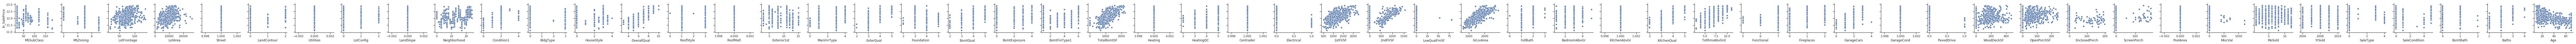

In [23]:
df['ln_SalePrice'] = np.log(df['SalePrice'])

sns.set(style="ticks", color_codes=True)

# Generate a list of column headers not including price
x_columns = df.columns.drop(['SalePrice','ln_SalePrice'])

# Only plot the scatterplot of x variables with our y variable
fig = sns.pairplot(data=df, y_vars=['ln_SalePrice'], x_vars=x_columns)

In [24]:
# re-run the regression

y = df['ln_SalePrice']

X = df[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'MasVnrType', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition', 'BsmtBath', 'Baths',
       'Age']]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           ln_SalePrice   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     192.2
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        01:16:34   Log-Likelihood:                 791.14
No. Observations:                 863   AIC:                            -1490.
Df Residuals:                     817   BIC:                            -1271.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
MSSubClass       -0.0004      0.001     -0.689

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


now we're really getting somewhere

## 2.1 Run a test for high levels of collinearity in your dataset. Calculate the Variance Inflation Factor for each X variable. Do you see VIF values greater than ten? If so try omitting those X variables and run your regression again. Do the standard errors change? Do the coefficients change? Do the coefficients seem to have an interpretation that matches your intuition?

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

print(X.columns, '\n\n')

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'MasVnrType', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition', 'BsmtBath', 'Baths', 'Age'],
      dtype='object') 




/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1386: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1386: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[37.88021618802104, 1.5267023115459921, 1.8080873065772116, 2.2649578722714367, 0.0, 1.1161155401393328, nan, 1.1423299182739537, nan, 1.3526858335101757, 1.1898483741184933, 27.322301310828234, 21.36096522077983, 4.0815571360538225, 1.2311138786983045, 0.0, 1.1657432914593928, 1.1775694104873806, 3.4288374099825374, 2.1609407866766457, 3.129844552789496, 1.505599171907423, 1.6598373518548672, 5.582393752125306, 0.0, 1.7981295274430882, 0.0, 1.218396097945949, inf, inf, inf, inf, 3.972529500351592, 2.5781145355154678, 0.0, 3.002899190520101, 4.442892300892712, 1.2962003040918306, 1.506130811907706, 2.2057485280869016, 0.0, 1.14662608420347, 1.2012426423147853, 1.426437420494525, 1.1496095660257009, 1.0608065615687603, nan, 1.082248865600744, 1.1294740770773886, 1.1611748250259497, 3.2168061982007092, 3.394913877991869, 1.7269223708874037, 6.479614972048652, 2.693672591927903]


In [26]:
X.corr()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,RoofStyle,RoofMatl,Exterior1st,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,BsmtBath,Baths,Age
MSSubClass,1.000000,0.002877,-0.414330,-0.431305,NaN,-0.048837,NaN,-0.061583,NaN,-0.038228,0.050206,0.808786,0.511550,0.135533,-0.159199,NaN,-0.049856,-0.057681,0.134191,-0.145128,0.182019,0.107459,0.049652,-0.282005,NaN,0.060475,NaN,-0.107775,-0.304199,0.319363,0.135007,0.075036,0.136016,-0.209874,NaN,0.092955,-0.055100,0.001394,0.064558,0.071003,NaN,-0.000866,0.038986,0.060352,-0.054067,-0.000782,NaN,-0.045813,-0.026093,-0.000773,-0.031940,-0.018005,-0.035047,0.244104,-0.128434
MSZoning,0.002877,1.000000,-0.121131,-0.087142,NaN,0.047133,NaN,-0.002307,NaN,-0.333505,-0.120955,0.008490,-0.060274,-0.281642,0.027964,NaN,0.005365,-0.074547,-0.280689,0.293351,-0.279529,0.006215,-0.031485,-0.161539,NaN,-0.200531,NaN,0.165087,-0.107598,-0.108162,-0.136773,-0.188985,-0.322045,-0.072384,NaN,-0.224888,-0.133967,-0.022001,-0.028488,-0.193339,NaN,0.121915,0.013799,-0.307362,0.186141,0.031081,NaN,0.030540,-0.015095,0.010650,-0.214321,-0.220005,0.002942,-0.308932,0.252991
LotFrontage,-0.414330,-0.121131,1.000000,0.553664,NaN,-0.009972,NaN,0.080690,NaN,0.113120,-0.013247,-0.466677,0.000414,0.232634,0.154832,NaN,0.018559,-0.081232,0.149237,-0.068405,0.163656,0.077827,-0.011457,0.310971,NaN,0.061744,NaN,-0.094977,0.332773,0.091170,-0.102385,0.344110,0.169844,0.330612,NaN,0.160078,0.361341,0.004685,0.212062,0.266315,NaN,-0.007279,0.067482,0.139967,-0.039261,0.034948,NaN,0.005242,-0.010874,-0.006231,0.088970,0.081871,0.006678,0.182002,-0.069209
LotArea,-0.431305,-0.087142,0.553664,1.000000,NaN,0.043628,NaN,0.264332,NaN,0.092702,0.083808,-0.531981,0.074451,0.183188,0.124241,NaN,0.087012,-0.059910,0.092753,-0.037968,0.121616,0.097219,-0.035813,0.247293,NaN,0.033646,NaN,-0.044582,0.329732,0.156430,-0.060280,0.405246,0.208906,0.427652,NaN,0.098582,0.415572,-0.047891,0.268199,0.227050,NaN,0.082202,0.129515,0.110878,-0.017876,0.044809,NaN,0.019869,0.011439,-0.008152,0.039193,0.033961,0.023626,0.215849,-0.023850
Street,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandContour,-0.048837,0.047133,-0.009972,0.043628,NaN,1.000000,NaN,0.008183,NaN,0.077761,0.011895,-0.037978,-0.063158,0.104555,0.040478,NaN,0.031312,0.055631,0.033210,-0.011061,0.063206,0.117658,-0.010701,0.082687,NaN,0.041882,NaN,-0.005317,0.086902,-0.041582,-0.012817,0.026804,0.009076,-0.051809,NaN,0.031228,0.015858,-0.000885,0.080603,0.075244,NaN,0.082973,0.030675,-0.026403,0.051150,-0.018886,NaN,-0.028919,0.098556,-0.019787,0.065414,0.077098,-0.011744,-0.022286,-0.025048
Utilities,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotConfig,-0.061583,-0.002307,0.080690,0.264332,NaN,0.008183,NaN,1.000000,NaN,0.004600,-0.014104,-0.091660,0.033432,0.012233,-0.004095,NaN,-0.063982,0.012915,-0.020082,-0.005965,0.028031,0.040729,-0.029081,0.013241,NaN,-0.010215,NaN,-0.047045,0.027046,0.038083,-0.006271,0.057631,0.019162,0.096729,NaN,-0.014714,0.047403,0.048659,0.029561,0.069576,NaN,0.004407,0.042232,0.043398,0.005933,-0.020752,NaN,0.008994,-0.018937,0.027573,-0.033967,-0.053135,-0.004359,0.036544,-0.039095
LandSlope,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [27]:
X = df[[
       'LandContour', 'LotConfig', 'Neighborhood',
       'RoofStyle',
       'MasVnrType',
       'BsmtExposure', 'BsmtFinType1',
       'Electrical', 
       'Fireplaces', 
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'MiscVal',
       'SaleType', 'SaleCondition', 'BsmtBath',
       'Age']]

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

[1.099495682496248, 1.2908872363979744, 5.197389259534958, 3.8551329919465394, 4.608606840279858, 1.697348373374134, 5.828641081909378, 1.1982969121401985, 2.2231364413488124, 1.0656814569407087, 1.9448640863079638, 1.9503905163257074, 1.1718322440661282, 1.069433471772198, 1.041753600044154, 3.482560110028831, 3.747495273736703, 2.8473913299797453, 3.8009685904225217]


In [28]:
# remove constant x variables with NaN correlation
# remove x variables with high VIF values

# re-run the regression

y = df['ln_SalePrice']

X = df[['LandContour', 'LotConfig', 'Neighborhood',
       'RoofStyle',
       'MasVnrType',
       'BsmtExposure', 'BsmtFinType1',
       'Electrical', 
       'Fireplaces', 
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'MiscVal',
       'SaleType', 'SaleCondition', 'BsmtBath',
       'Age']]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           ln_SalePrice   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     67.26
Date:                Fri, 18 Jan 2019   Prob (F-statistic):          3.30e-154
Time:                        01:16:46   Log-Likelihood:                 132.20
No. Observations:                 863   AIC:                            -224.4
Df Residuals:                     843   BIC:                            -129.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.9394      0.036    332.531

## 2.2 Variables that have high levels of multicollinearity should also be highly correlated with each other. Calculate your X matrix's correlation matrix to check if the variables highlighted by the VIF test truly are highly correlated.

see above, they certainly were... and are not now...

In [29]:
X.corr()

,const,LandContour,LotConfig,Neighborhood,RoofStyle,MasVnrType,BsmtExposure,BsmtFinType1,Electrical,Fireplaces,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,SaleType,SaleCondition,BsmtBath,Age
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandContour,NaN,1.000000,0.008183,0.077761,0.040478,0.055631,0.117658,-0.010701,-0.005317,0.080603,0.082973,0.030675,-0.026403,0.051150,-0.018886,-0.028919,0.065414,0.077098,-0.011744,-0.025048
LotConfig,NaN,0.008183,1.000000,0.004600,-0.004095,0.012915,0.040729,-0.029081,-0.047045,0.029561,0.004407,0.042232,0.043398,0.005933,-0.020752,0.008994,-0.033967,-0.053135,-0.004359,-0.039095
Neighborhood,NaN,0.077761,0.004600,1.000000,0.091032,0.081710,-0.066323,0.049274,-0.076508,0.045646,-0.009077,0.043415,0.173858,0.043605,-0.000654,0.019420,0.104294,0.109369,0.043772,-0.041006
RoofStyle,NaN,0.040478,-0.004095,0.091032,1.000000,-0.170105,0.029418,0.023268,-0.054007,0.109564,-0.057194,0.104792,-0.054532,-0.014115,0.000441,-0.007319,0.032298,0.002551,0.051774,0.043573
MasVnrType,NaN,0.055631,0.012915,0.081710,-0.170105,1.000000,-0.035248,-0.094621,0.096930,-0.096733,0.048274,-0.068299,0.022379,0.075548,-0.002106,0.000111,0.075497,0.111002,-0.027364,-0.038453
BsmtExposure,NaN,0.117658,0.040729,-0.066323,0.029418,-0.035248,1.000000,0.212692,-0.076823,0.060070,-0.003746,0.193227,-0.028131,-0.108039,0.002386,-0.037769,0.101906,0.138300,0.190037,-0.206185
BsmtFinType1,NaN,-0.010701,-0.029081,0.049274,0.023268,-0.094621,0.212692,1.000000,-0.080639,0.014436,-0.093193,0.077055,-0.001650,-0.082839,-0.014269,0.002565,-0.106220,-0.125748,0.567391,-0.093402
Electrical,NaN,-0.005317,-0.047045,-0.076508,-0.054007,0.096930,-0.076823,-0.080639,1.000000,-0.045616,0.065121,-0.111252,-0.101309,0.138280,-0.003504,-0.029666,-0.069369,-0.083179,-0.031931,0.299014
Fireplaces,NaN,0.080603,0.029561,0.045646,0.109564,-0.096733,0.060070,0.014436,-0.045616,1.000000,0.041978,0.168967,0.145608,-0.021539,0.109359,-0.011646,0.008093,0.018940,0.040906,-0.054080


## 2.3 If you have varaibles with high Variance Inflation Factors, try excluding them from your regression. Do your standard errors improve? (get smaller). If high levels of multicollinearity are removed, the precision of the dataset should increase.

see above

## 2.4 Recalculate your regression using Robust Standard Errors? What happens to your standard errors?

In [30]:
# Lets run our regression again using Robust Standard Errors
# cov_type='HC3' parameter to .fit() function

# Log-Linear Regression

y = df['ln_SalePrice']

X = df[['LandContour', 'LotConfig', 'Neighborhood',
       'RoofStyle',
       'MasVnrType',
       'BsmtExposure', 'BsmtFinType1',
       'Electrical', 
       'Fireplaces', 
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'MiscVal',
       'SaleType', 'SaleCondition', 'BsmtBath',
       'Age']]

# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

# This makes our standard errors robust to correct Heteroskedasticity
model = sm.OLS(y, X).fit(cov_type='HC3')
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           ln_SalePrice   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     70.63
Date:                Fri, 18 Jan 2019   Prob (F-statistic):          1.40e-159
Time:                        01:16:54   Log-Likelihood:                 132.20
No. Observations:                 863   AIC:                            -224.4
Df Residuals:                     843   BIC:                            -129.2
Df Model:                          19                                         
Covariance Type:                  HC3                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.9394      0.035    337.047

actually making standard errors worse across the board but showing that my constant is even more significant than prior... not too surprising

## 2.5 Use scatterplots or Seaborn's pairplot functionality to perform an eyeball test for potential variables that would be candidates for generating polynomial regressors. 

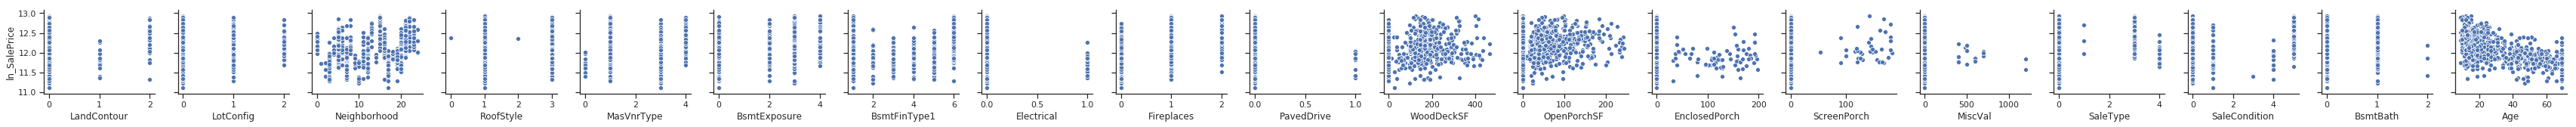

In [35]:
sns.set(style="ticks", color_codes=True)

# Generate a list of column headers not including price
x2_columns = ['LandContour', 'LotConfig', 'Neighborhood','RoofStyle',
                'MasVnrType','BsmtExposure', 'BsmtFinType1','Electrical', 
                'Fireplaces', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
                'EnclosedPorch', 'ScreenPorch', 'MiscVal','SaleType', 
                'SaleCondition', 'BsmtBath', 'Age']

# Only plot the scatterplot of x variables with our y variable
fig = sns.pairplot(data=df, y_vars=['ln_SalePrice'], x_vars=x2_columns)

Age, OpenPorchSF, WoodDeckSF

## 2.6 Use seaborn's residplot to plot the distribution of each x variable's residuals. Does these plots indicate any other features that would be potential candidates for polynomial features.

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:4033: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


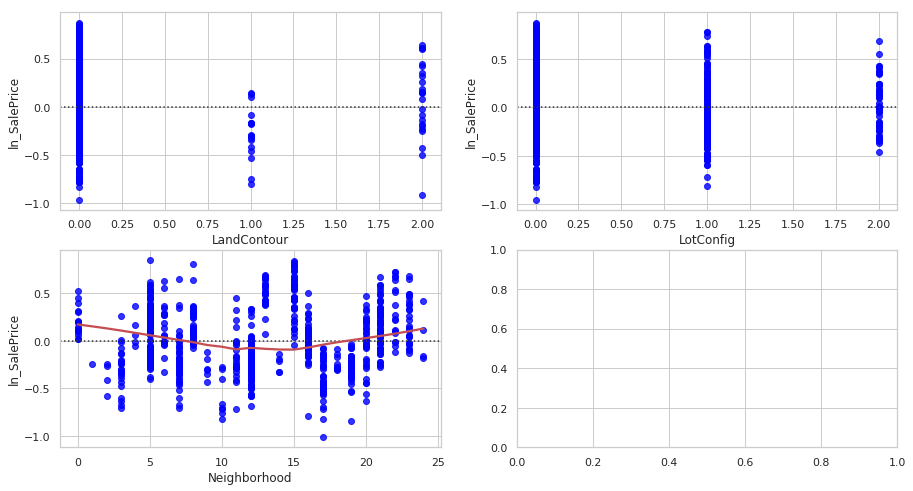

In [44]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15,8))
sns.residplot(df['LandContour'], y, lowess=True, color="r", ax=axs[0][0], scatter_kws={'color':'blue'})
sns.residplot(df['LotConfig'], y, lowess=True, color="r", ax=axs[0][1], scatter_kws={'color':'blue'})
sns.residplot(df['Neighborhood'], y, lowess=True, color="r", ax=axs[1][0], scatter_kws={'color':'blue'})


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:4033: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


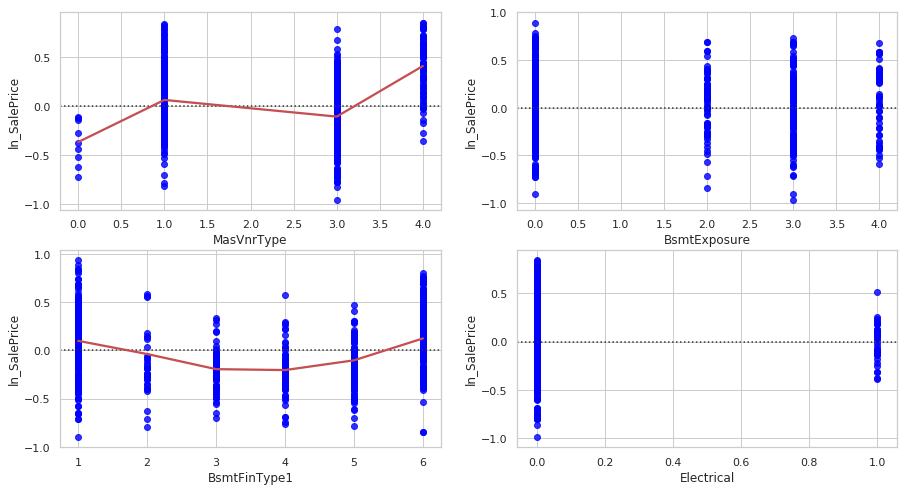

In [45]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15,8))

sns.residplot(df['MasVnrType'], y, lowess=True, color="r", ax=axs[0][0], scatter_kws={'color':'blue'})
sns.residplot(df['BsmtExposure'], y, lowess=True, color="r", ax=axs[0][1], scatter_kws={'color':'blue'})
sns.residplot(df['BsmtFinType1'], y, lowess=True, color="r", ax=axs[1][0], scatter_kws={'color':'blue'})
sns.residplot(df['Electrical'], y, lowess=True, color="r", ax=axs[1][1], scatter_kws={'color':'blue'});


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:4033: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


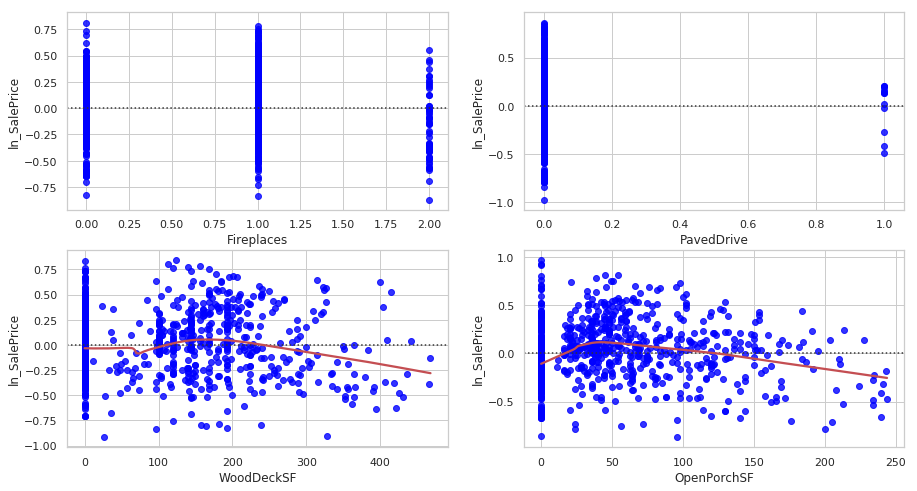

In [46]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15,8))

sns.residplot(df['Fireplaces'], y, lowess=True, color="r", ax=axs[0][0], scatter_kws={'color':'blue'})
sns.residplot(df['PavedDrive'], y, lowess=True, color="r", ax=axs[0][1], scatter_kws={'color':'blue'})
sns.residplot(df['WoodDeckSF'], y, lowess=True, color="r", ax=axs[1][0], scatter_kws={'color':'blue'})
sns.residplot(df['OpenPorchSF'], y, lowess=True, color="r", ax=axs[1][1], scatter_kws={'color':'blue'});


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:4033: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


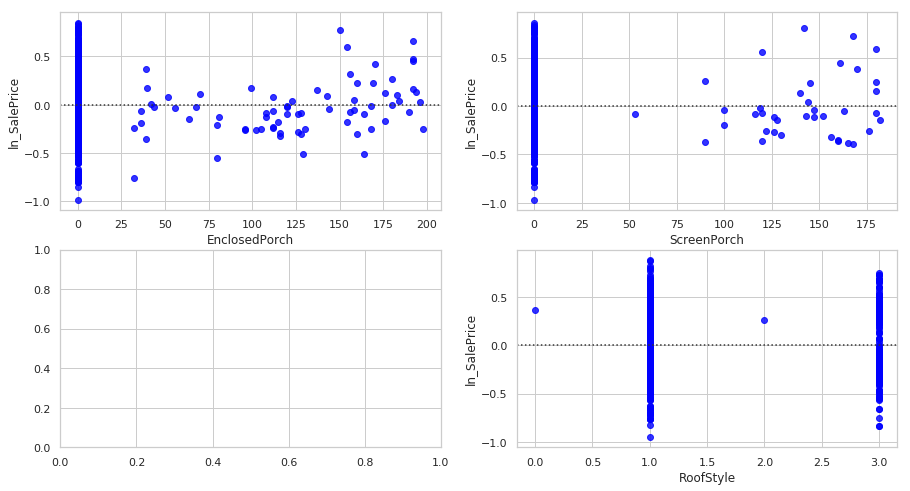

In [47]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15,8))

sns.residplot(df['RoofStyle'], y, lowess=True, color="r", ax=axs[1][1], scatter_kws={'color':'blue'});
sns.residplot(df['EnclosedPorch'], y, lowess=True, color="r", ax=axs[0][0], scatter_kws={'color':'blue'})
sns.residplot(df['ScreenPorch'], y, lowess=True, color="r", ax=axs[0][1], scatter_kws={'color':'blue'})

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:4033: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


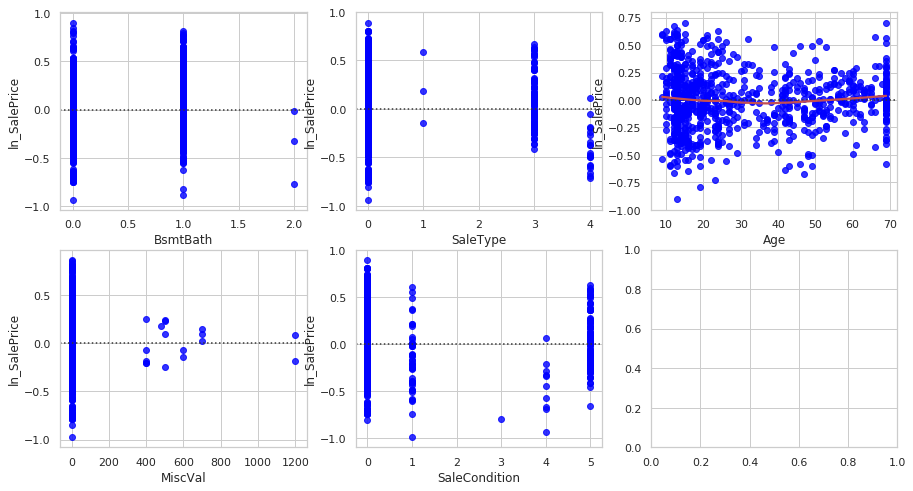

In [43]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(15,8));

sns.residplot(df['MiscVal'], y, lowess=True, color="r", ax=axs[1][0], scatter_kws={'color':'blue'})
sns.residplot(df['SaleType'], y, lowess=True, color="r", ax=axs[0][1], scatter_kws={'color':'blue'});
sns.residplot(df['SaleCondition'], y, lowess=True, color="r", ax=axs[1][1], scatter_kws={'color':'blue'});
sns.residplot(df['BsmtBath'], y, lowess=True, color="r", ax=axs[0][0], scatter_kws={'color':'blue'});
sns.residplot(df['Age'], y, lowess=True, color="r", ax=axs[0][2], scatter_kws={'color':'blue'});

Age, Neighborhood, WoodDeckSF, OpenPorchSF, BsmtFinType1

## 2.6 Feature Engineer the appropriate polynomial features from your analysis above and include them in one final log-polynomial, robust standard error, regression. Do the coefficients of this most advanced regression match your intuition better than the coefficients of the very first regression that we ran with the Statmodels library?

In [0]:
df['Age_squared'] = df['Age']**2
df['Neighborhood_squared'] = df['Neighborhood']**2
df['WoodDeckSF_squared'] = df['WoodDeckSF']**2
df['OpenPorchSF_squared'] = df['OpenPorchSF']**2
df['BsmtFinType1_squared'] = df['BsmtFinType1']**2

In [49]:
# log-polynomial? linear regression model with robust standard errors 

# to use Robust Standard Errors pass:
# cov_type='HC3' parameter to .fit() function

y = df['ln_SalePrice']

X = df[['LandContour', 'LotConfig', 'Neighborhood','RoofStyle','MasVnrType',
        'BsmtExposure', 'BsmtFinType1','Electrical', 'Fireplaces','PavedDrive',
        'WoodDeckSF', 'OpenPorchSF','EnclosedPorch', 'ScreenPorch', 'MiscVal',
        'SaleType', 'SaleCondition', 'BsmtBath','Age', 'Age_squared',
        'Neighborhood_squared', 'WoodDeckSF_squared', 'OpenPorchSF_squared',
        'BsmtFinType1_squared']]

# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

model = sm.OLS(y, X).fit(cov_type='HC3')
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           ln_SalePrice   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     65.79
Date:                Fri, 18 Jan 2019   Prob (F-statistic):          3.41e-174
Time:                        01:37:03   Log-Likelihood:                 174.89
No. Observations:                 863   AIC:                            -299.8
Df Residuals:                     838   BIC:                            -180.8
Df Model:                          24                                         
Covariance Type:                  HC3                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.1230 